In [1]:
import sys
sys.path.append('../../../')
import helper

from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import inspect

In [2]:
def f(x, w):
    return np.sin(w[0] * x) + w[1]

result_name = '2'
params = {
    "f_label": inspect.getsource(f),
    "density": 8000,
    "dots_count": 1000,
    "radius": 0.1,
    "dist": 2.5,
    "w0": 2,
    "w1": 3,
    "test_count": 10,
}

X = np.linspace(-params["dist"], params["dist"], params["density"])
Y = np.array([f(x, np.array([params["w0"], params["w1"]], dtype=float)) for x in X])

datasets = [0] * params["test_count"]

for k in tqdm(range(params["test_count"])):
    datasets[k] = helper.generate_full_dataset(X, Y, params["dots_count"], params["radius"])


100%|██████████| 10/10 [00:14<00:00,  1.41s/it]


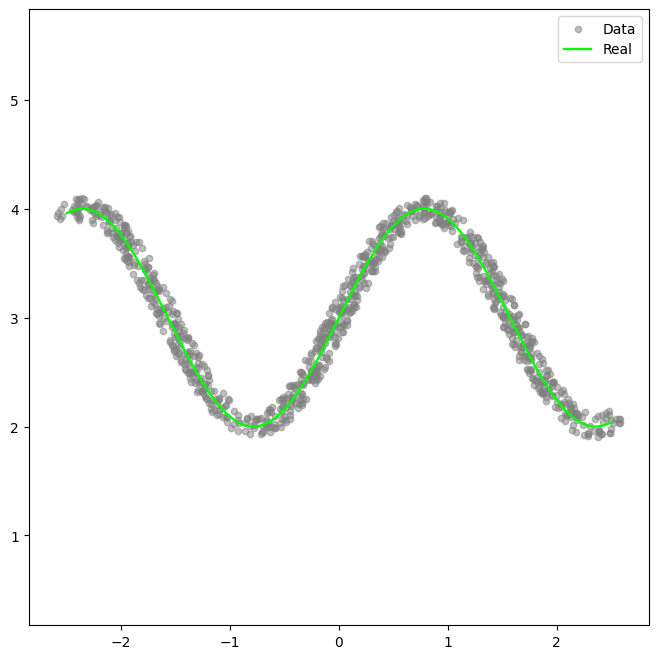

In [3]:
helper.print_generated(X, Y, datasets[0])

In [4]:
helper.save_datasets(X, Y, datasets, 'temp')
helper.add_dataset(result_name, params, 'temp')